The folder $\text{pyth}$ contains outcome $y$ and inputs $x_1$, $x_2$ for 40 data points, with a further 20 points with the inputs but no observed outcome.

a. Use ~~R~~ Python to fit a linear regression model predicting $y$ from $x_1$, $x_2$, using the first 40 data points in the file. Summarize the inferences and check the fit of your model.

b. Display the estimated model graphically as in Figure 3.2.

c. Make a residual plot of the model. Do the assumptions appear to be met?

d. Make predictions for the remaining 20 data points in the file. How confident do you feel about these predictions?

In [100]:
from sklearn import linear_model

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [94]:
df = pd.read_csv('pyth/exercise3.1.dat', sep=' ')

In [101]:
x_train = df[['x1','x2']].iloc[0:40]
y_train = df['y'].iloc[0:40]
x_test = df[['x1','x2']].iloc[40:60]

regr = linear_model.LinearRegression()
model = regr.fit(x_train, y_train)
goodness = model.score(x_train, y_train)

In [102]:
regr = linear_model.LinearRegression()

In [103]:
model = regr.fit(x_train, y_train)

In [106]:
# Part A
print('Coefficients: {c}\nIntercept: {i}'.format(c=model.coef_, i=model.intercept_))
print('Goodness of fit: {g}'.format(g=goodness))

Coefficients: [ 0.51481039  0.80691953]
Intercept: 1.3151347128379545
Goodness of fit: 0.9724240642757969


In [111]:
x1_regression = model.intercept_ + model.coef_[0]*x_train['x1'] + model.coef_[1]*x_train['x2'].mean()
x2_regression = model.intercept_ + model.coef_[0]*x_train['x1'].mean() + model.coef_[1]*x_train['x2']

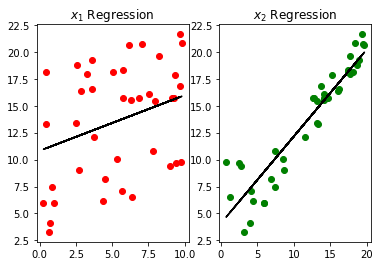

In [159]:
# Part B
plt.subplot(1, 2, 1)
plt.plot(x_train['x1'], y_train, 'ro')
plt.plot(x_train['x1'], x1_regression, 'k-')
plt.title('$x_1$ Regression')

plt.subplot(1, 2, 2)
plt.plot(x_train['x2'], y_train, 'go')
plt.plot(x_train['x2'], x2_regression, 'k-')
plt.title('$x_2$ Regression')

plt.show()

In [137]:
# Part C

x1_residual = []
for i, regr in enumerate(x1_regression):
    x1_residual.append(y_train.iloc[i]-regr)

x2_residual = []
for i, regr in enumerate(x2_regression):
    x2_residual.append(y_train.iloc[i]-regr)

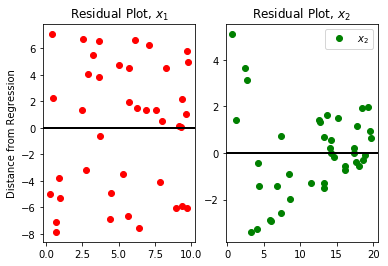

In [167]:
plt.subplot(1,2,1)
plt.plot(x_train['x1'], x1_residual, 'ro', label='$x_1$')
plt.axhline(linewidth=2, color='k')
plt.ylabel('Distance from Regression')
plt.title('Residual Plot, $x_1$')

plt.subplot(1,2,2)
plt.plot(x_train['x2'], x2_residual, 'go', label='$x_2$')
plt.axhline(linewidth=2, color='k')

plt.legend()
plt.title('Residual Plot, $x_2$')
plt.show()

The $x_2$ fit shows elements of heteroscedasticity. The scatter of the $x_2$ input at higher values decreases compared to lower ones.

In [178]:
# Part d
y_test = model.intercept_ + model.coef_[0]*x_test['x1'] + model.coef_[1]*x_test['x2']

In [185]:
prediction_df = pd.DataFrame(y_test, columns=['prediction'])

Not very confident due to the residual plot issues. 